In [1]:
push!(LOAD_PATH, ".")

3-element Array{ByteString,1}:
 "/Users/farr/Documents/code/julia/usr/local/share/julia/site/v0.4"
 "/Users/farr/Documents/code/julia/usr/share/julia/site/v0.4"      
 "."                                                               

In [2]:
using DataFrames
using Gadfly
using Kalman
using Base.Test:@test_approx_eq_eps

Generate some non-uniformly spaced times, and some observational errors:

In [3]:
ts = collect(1:3000) + 0.5*rand(3000) - 0.25
dys = 0.1 + 0.1*rand(3000)
nothing

In [4]:
dt = minimum(diff(ts))
T = (ts[end]-ts[1])
nothing

In [5]:
function randtscale(dt, T)
    exp(log(dt) + rand()*log(T/dt)) 
end

randtscale (generic function with 1 method)

In [6]:
mu = cbrt(pi)
sigma = float(pi)
x = -randtscale(dt, T)
y = randtscale(dt, T)
arroots = [-1.0/randtscale(dt,T), 1.0/(x+1im*y), 1.0/(x-1im*y)]
x = randtscale(dt,T)
y = randtscale(dt,T)
maroots = [1.0/(-x+1im*y), 1.0/(-x-1im*y)]
nothing

In [7]:
filt = Kalman.CARMAKalmanFilter(mu, sigma, arroots, maroots)
sfilt = Kalman.CARMASqrtKalmanFilter(mu, sigma, arroots, maroots)
nothing

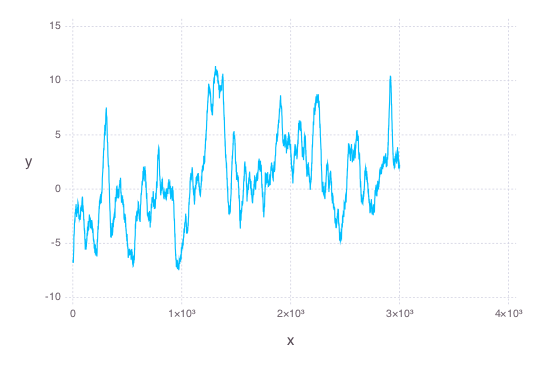

In [8]:
ys = Kalman.carmagenerate(ts, dys, mu, sigma, arroots, maroots)
plot(x=ts, y=ys, Geom.line)

Let's look at the equivalent generated from the filter (these won't match exactly, of course, but they will look similar, hopefully):

Mean of ysg = 1.132875883516617, mu = 1.4645918875615231


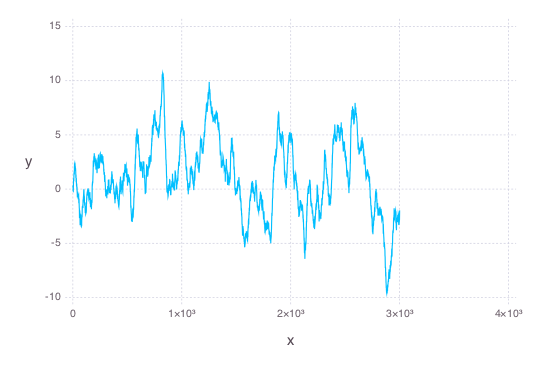

Std of ysg = 3.4281876420165345, sigma = 3.141592653589793


In [15]:
ysg = Kalman.generate(filt, ts, dys)
println("Mean of ysg = $(mean(ysg)), mu = $mu")
println("Std of ysg = $(std(ysg)), sigma = $sigma")
plot(x=ts, y=ysg, Geom.line)

In [9]:
Kalman.raw_carma_log_likelihood(ts, ys, dys, mu, sigma, arroots, maroots)

1448.2724244632764

In [10]:
Kalman.log_likelihood(sfilt, ts, ys, dys)

1448.2724244632573

In [11]:
Kalman.log_likelihood(filt, ts, ys, dys)

1448.2724244632932

In [12]:
@time for i in 1:1000; Kalman.log_likelihood(filt, ts, ys, dys) end

  2.028846 seconds (3.00 k allocations: 328.125 KB)


In [13]:
Profile.clear()
@profile for i in 1:1000; Kalman.log_likelihood(filt, ts, ys, dys) end
Profile.print()

4    complex.jl; /; line: 194
1    complex.jl; exp; line: 369
1492 task.jl; anonymous; line: 447
 1492 .../IJulia/src/IJulia.jl; eventloop; line: 141
  1492 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 177
   1492 loading.jl; include_string; line: 266
    1    ./inference.jl; typeinf_ext; line: 1283
     1 ./inference.jl; typeinf; line: 1339
      1 ./inference.jl; typeinf_uncached; line: 1622
       1 ./inference.jl; abstract_eval; line: 961
        1 ./inference.jl; abstract_eval_call; line: 934
         1 ./inference.jl; abstract_call; line: 879
          1 ./inference.jl; abstract_call_gf; line: 737
           1 ./inference.jl; typeinf; line: 1289
            1 ./inference.jl; typeinf; line: 1339
             1 ./inference.jl; typeinf_uncached; line: 1549
              1 ./inference.jl; abstract_interpret; line: 1110
               1 ./inference.jl; abstract_eval; line: 961
                1 ./inference.jl; abstract_eval_call; line: 934
                 1 ./inference